In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4

In [6]:
def snake_case(s):
    s = s.replace(' ', '')
    return ''.join(['_'+i.lower() if i.isupper() else i for i in s]).lstrip('_')

In [7]:
customer_df.columns = map(snake_case, customer_df.columns)

In [8]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,numberof_open_complaints,numberof_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


5

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [10]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,numberof_open_complaints,numberof_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


6

In [11]:
numerical_df = customer_df._get_numeric_data()

In [12]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,numberof_open_complaints,numberof_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


7

In [13]:
def differentiate_vars(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    
    for col in df.columns:
        if len(df[col].unique()) > 10:
            continuous_df[col] = df[col]
        else:
            discrete_df[col] = df[col]
    
    return continuous_df, discrete_df


In [14]:
continuous_df, discrete_df = differentiate_vars(numerical_df)

In [15]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [16]:
discrete_df.head()

,numberof_open_complaints,numberof_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


8

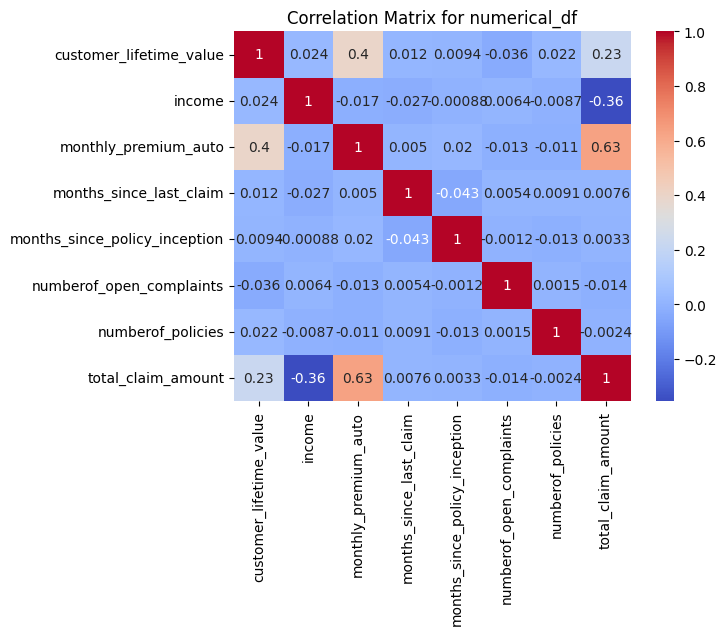

In [17]:
corr_matrix = numerical_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for numerical_df')
plt.show()

There are no high correlations between numerical columns in the dataframe. The highest value is 0.63 in monthly_premium_auto & total_claim_amount, but that's still an acceptable value

9

In [18]:
def plot_vars(df):
    continuous_df, discrete_df = differentiate_vars(df)
    
    for col in discrete_df.columns:
        plt.figure()
        sns.countplot(x=col, data=df)
        plt.title(col)
    
    for col in continuous_df.columns:
        plt.figure()
        sns.histplot(x=col, data=df)
        plt.title(col)

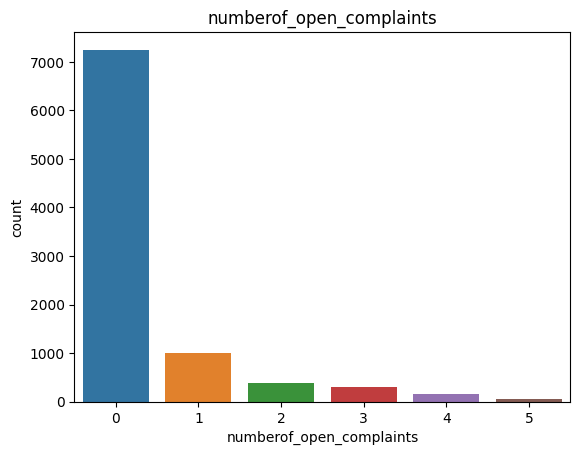

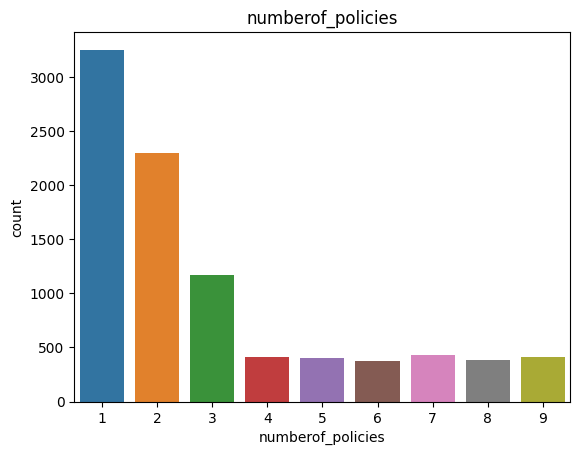

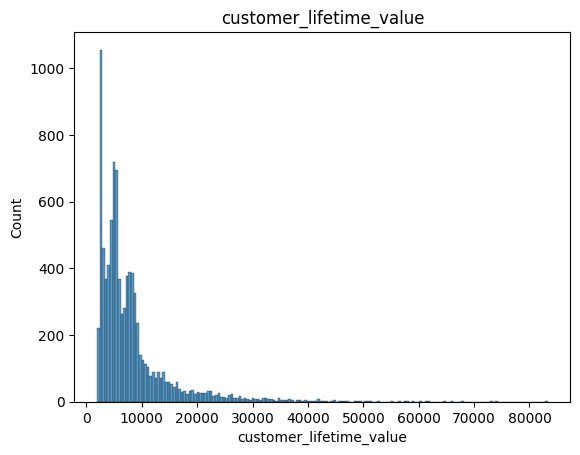

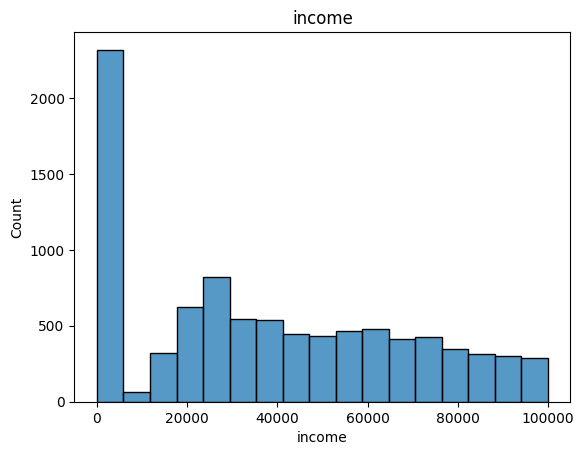

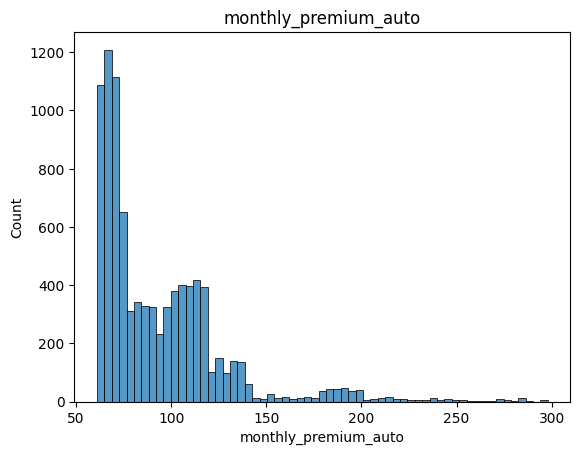

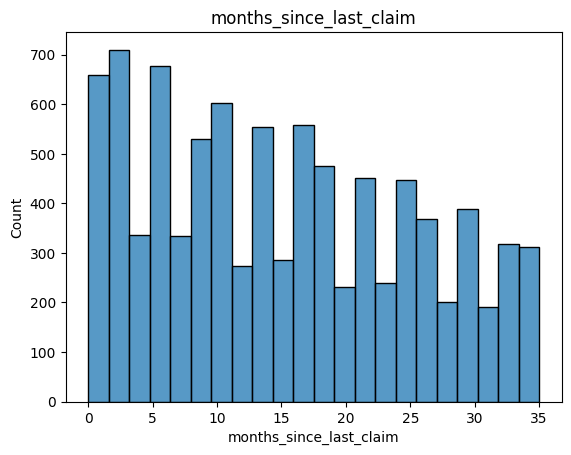

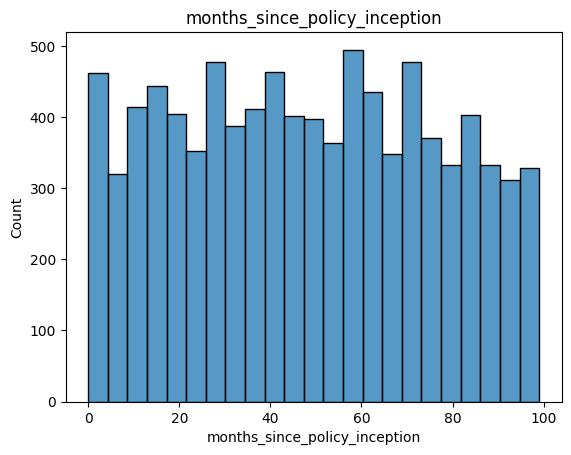

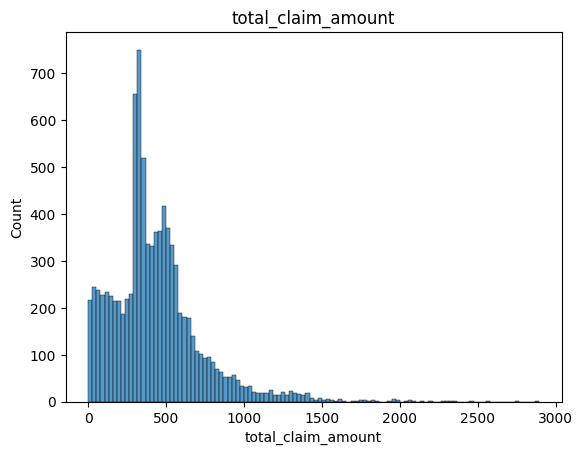

In [19]:
plot_vars(numerical_df)

10

None of the values are normally distributed

11

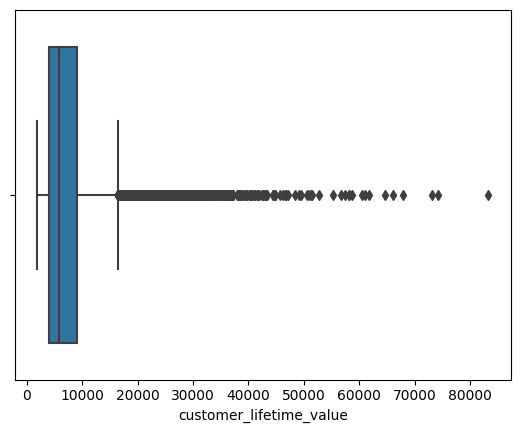

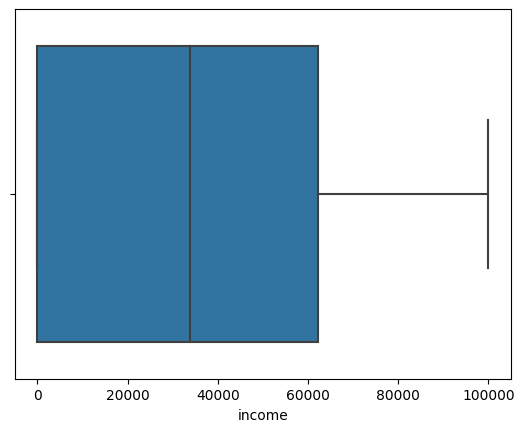

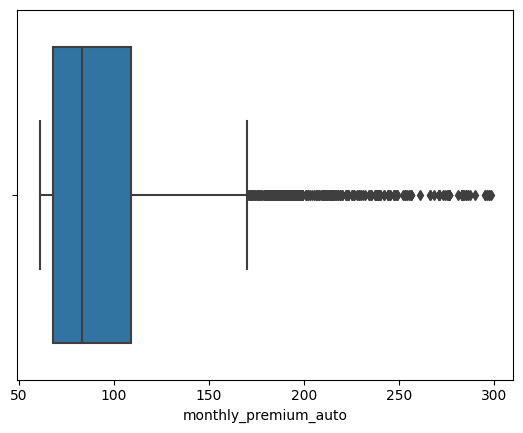

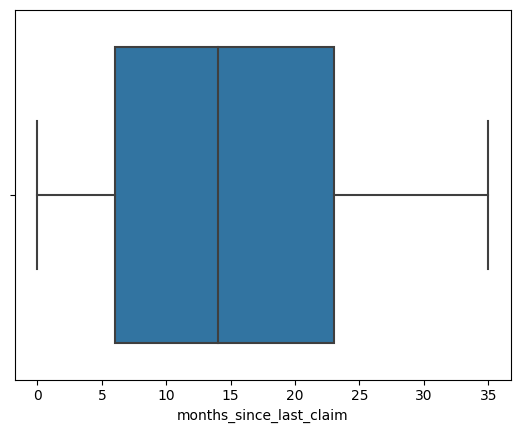

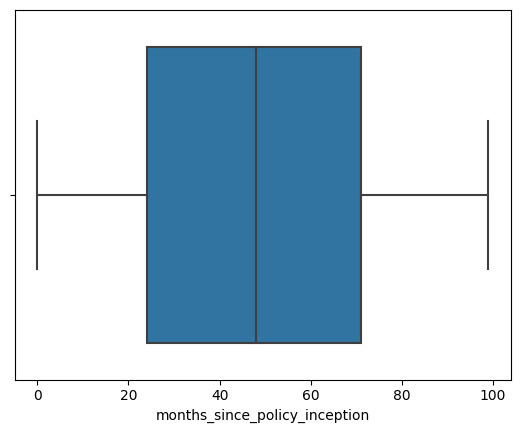

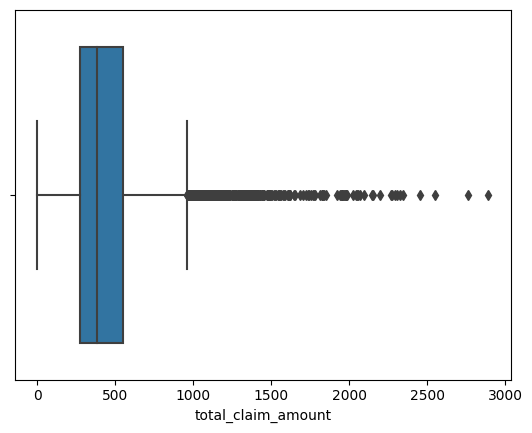

In [20]:
for col in continuous_df.columns:
    plt.figure()
    sns.boxplot(x=col, data=continuous_df)


12

Yes, i did. I will remove them

In [21]:
for col in continuous_df.columns:
        mean = np.mean(continuous_df[col])
        std = np.std(continuous_df[col])
        # numerical_df[col] = numerical_df[numerical_df[col] < (mean - (2 * std))]
        # numerical_df[col] = numerical_df[numerical_df[col] < (mean + (2 * std))]
        continuous_df = continuous_df[(continuous_df[col] > (mean - (2 * std))) & (continuous_df[col] < (mean + (2 * std)))]


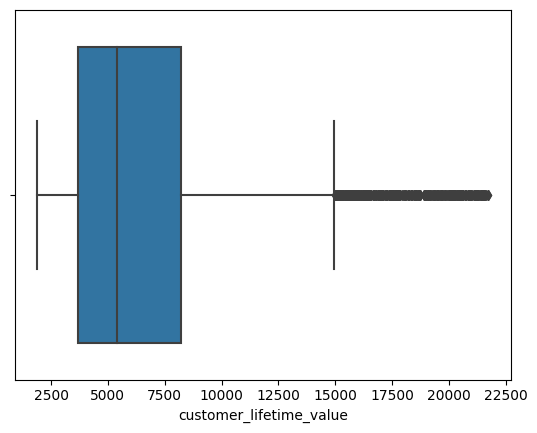

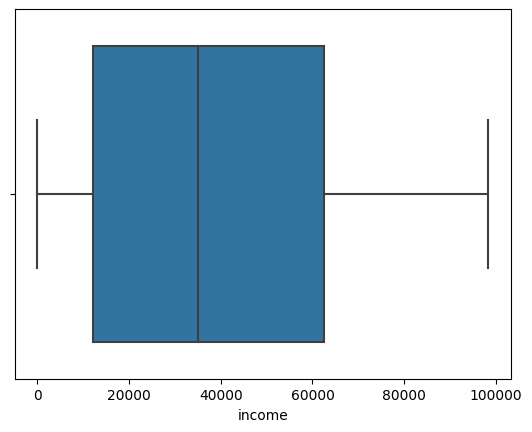

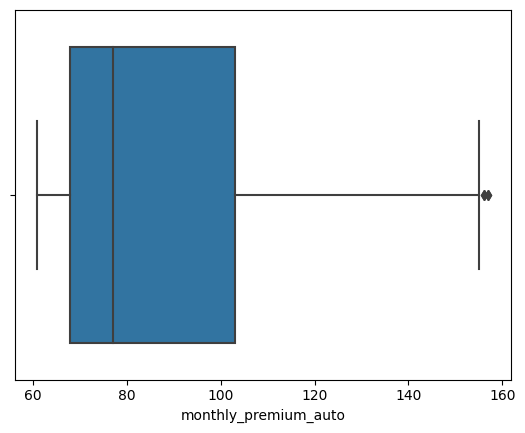

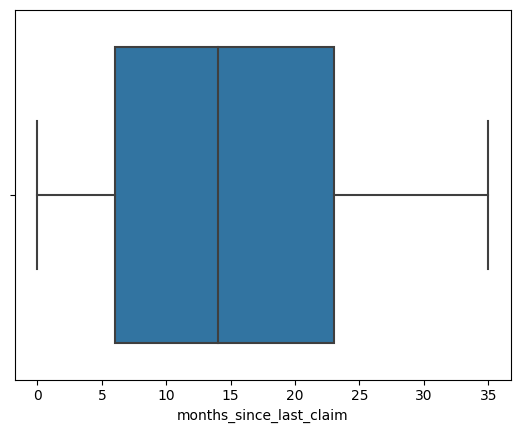

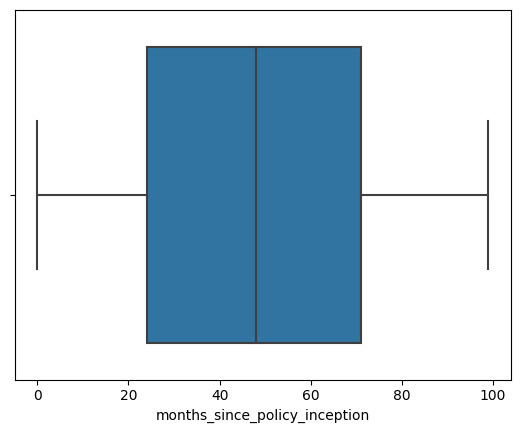

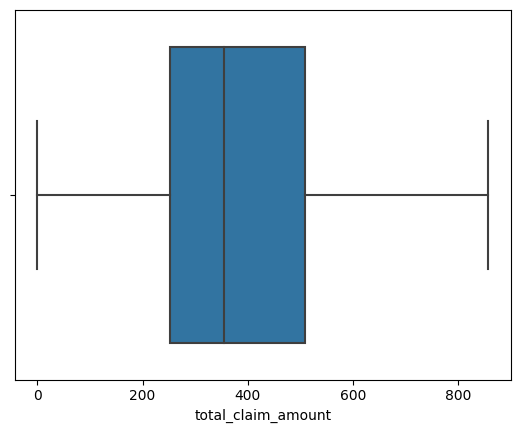

In [22]:
for col in continuous_df.columns:
    plt.figure()
    sns.boxplot(x=col, data=continuous_df)

13

In [23]:
numerical_df.isna().value_counts()

customer_lifetime_value  income  monthly_premium_auto  months_since_last_claim  months_since_policy_inception  numberof_open_complaints  numberof_policies  total_claim_amount
False                    False   False                 False                    False                          False                     False              False                 9134
dtype: int64

There are no null values

14

In [24]:
numerical_df.to_csv('numerical_df.csv', index=False)

---------------------------------------------------- LAB COMPARING REGRESSION MODELS------------------------------------------------------------------------

1

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


2

In [26]:
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,numberof_open_complaints,numberof_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [27]:
X = numerical_df.drop('total_claim_amount', axis=1)
y = numerical_df['total_claim_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [28]:
r2_score(y_test, predictions)

0.48619642633200644

3

In [29]:
def train_and_test_models(models, X_train, y_train, X_test, y_test, num_runs=1):
    predictions = {}

    for model in models:
        # Initialize a list to store predictions for each run of the model
        model_predictions = []
        for i in range(num_runs):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            model_predictions.append(y_pred)
        mean_predictions = sum(model_predictions) / len(model_predictions)
        predictions[str(model)] = mean_predictions

    return predictions


In [30]:
# Initialize a list of regression models to train
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5)]

# Train and test the models using the function
predictions = train_and_test_models(models, X_train, y_train, X_test, y_test, num_runs=5)

# Print the predictions for each model
for model, preds in predictions.items():
    print(f'{model} predictions: {preds}')


LinearRegression() predictions: [213.86564668 665.15186672 305.8132429  ... 388.94732418 595.39327124
 437.49277109]
KNeighborsRegressor() predictions: [387.3506656 460.7394218 573.932283  ... 372.5914442 413.7358338
 440.9919566]


In [31]:
def train_and_test_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,5), max_iter=1000, num_runs=5):
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter)
    for i in range(num_runs):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions.append(y_pred)
    mean_predictions = sum(predictions) / len(predictions)
    return mean_predictions

In [32]:
mlp_predictions = train_and_test_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,5), max_iter=1000, num_runs=5)
print(f'MLPRegressor predictions: {mlp_predictions}')

MLPRegressor predictions: [238.11774123 571.58489576 298.19123769 ... 425.08968007 552.0466935
 445.94059996]
